In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# loding csv file into dataframe.

data = pd.read_csv('/Users/amit/Downloads/Language Detection.csv')
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
# Counting number of sentences in the given languages.
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
sr=pd.Series(data["Language"].value_counts())
lan=sr.to_numpy()
sr2=pd.Series(data["Language"].value_counts().index.tolist())
lan2=sr2.to_numpy()


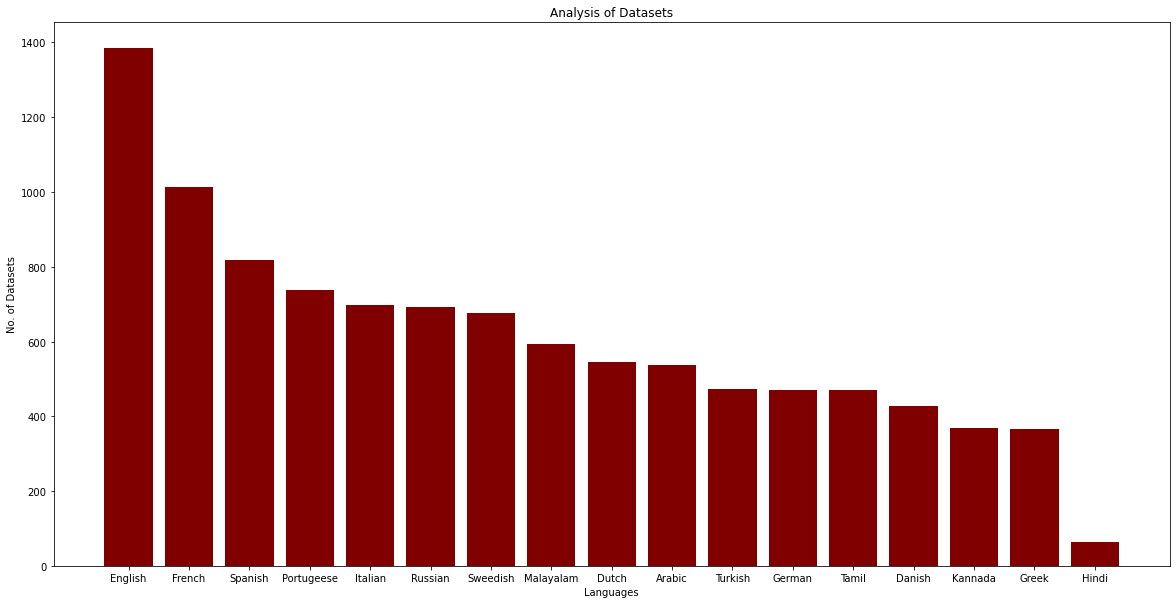

In [5]:
fig = plt.figure(figsize = (20, 10))
plt.bar(lan2, lan, color ='maroon',)
plt.xlabel("Languages")
plt.ylabel("No. of Datasets")
plt.title("Analysis of Datasets")
plt.show()

In [6]:
# Now saperating Independent and Dependent variable.

y=data['Language']
x=data['Text']

In [7]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [8]:
x

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [9]:
# total no of languages in series y .

y.count()

10337

In [10]:
# Extracting unique languages from y

z=pd.DataFrame(y.unique())

In [11]:
z

,0
0,English
1,Malayalam
2,Hindi
3,Tamil
4,Portugeese
5,French
6,Dutch
7,Spanish
8,Greek
9,Russian


In [12]:
lbe=LabelEncoder()
z=lbe.fit_transform(y)

In [13]:
z

array([3, 3, 3, ..., 9, 9, 9])

In [14]:
z.shape

(10337,)

In [15]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in x:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`"0-9]', '', text)
        re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', '', text)
        text = re.sub(r'[[]]', '', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

<ipython-input-15-2b8444920ad2>:8: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', '', text)


In [16]:
data_list

[' nature i the broadest sese is the atural physical material world or uiverse.',
 'nature ca refer to the pheomea of the physical world ad also to life i geeral.',
 'the study of ature is a large if ot the oly part of sciece.',
 'although humas are part of ature huma activity is ofte uderstood as a separate category from other atural pheomea.',
 ' the word ature is borrowed from the old frech ature ad is derived from the lati word atura or essetial qualities iate dispositio ad i aciet times literally meat birth.',
 ' i aciet philosophy atura is mostly used as the lati traslatio of the greek word physis φύσις which origially related to the itrisic characteristics that plats aimals ad other features of the world develop of their ow accord.',
 ' \nthe cocept of ature as a whole the physical uiverse is oe of several expasios of the origial otio it bega with certai core applicatios of the word φύσις by pre-socratic philosophers though this word had a dyamic dimesio the especially for herac

In [17]:
x
w=x

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
w = cv.fit_transform(data_list).toarray()


In [19]:
w


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:

from sklearn.model_selection import train_test_split
x6_train, x6_test, y6_train, y6_test = train_test_split(w, z, test_size = 0.20)

In [21]:
w.shape

(10337, 38665)

In [22]:
# Classifier - Algorithm - SVM

    
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x6_train,y6_train)
    
# predict the labels on validation dataset
predictions_SVM = SVM.predict(x6_test)
    
# Use accuracy_score function to get the accuracy
ac6=accuracy_score(predictions_SVM, y6_test)
print(f"Accuracy is :{ac6*100}%")


Accuracy is :93.56866537717602%


In [23]:
cm6 = confusion_matrix(y6_test, predictions_SVM)

In [24]:
setoflbs=set(z)
print(setoflbs)
newlbs=lbe.inverse_transform(list(setoflbs))
print(newlbs)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


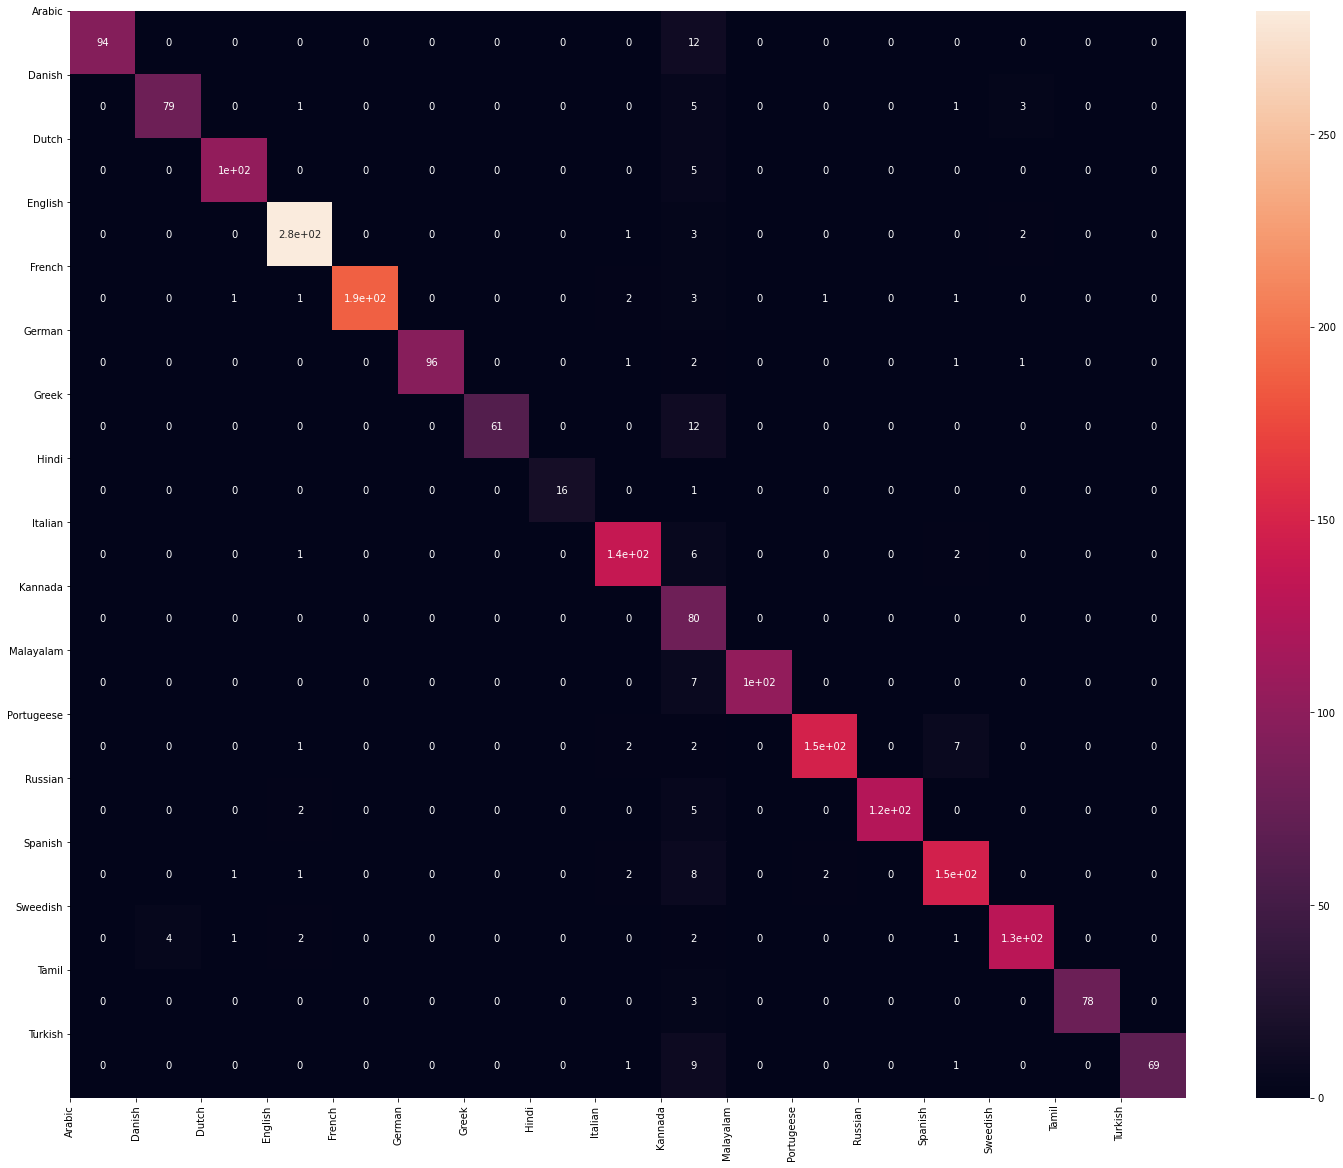

In [25]:
plt.figure(figsize=(25,20))
tick_marks = np.arange(len(newlbs))
sns.heatmap(cm6, annot = True)
plt.xticks(tick_marks, newlbs,rotation=90)
plt.yticks(tick_marks, newlbs,rotation=0)
plt.show()

In [26]:
def predict6(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = SVM.predict(x) # predicting the language
     lang = lbe.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [27]:
predict6("How are you doing ?")

The langauge is in English


In [28]:
predict6("Wie geht es Ihnen ?")

The langauge is in German


In [29]:
predict6("Nasılsın ?")#the language is Turkish

The langauge is in Kannada


In [30]:
predict6("आप कैसे हैं ?")

The langauge is in Hindi


In [31]:
predict6("Hoe gaat het ?")

The langauge is in Dutch


In [32]:
predict6("நீங்கள் எப்படி இருக்கிறீர்கள்?")

The langauge is in Tamil


In [33]:
predict6("Comment allez vous ?")

The langauge is in French


In [34]:
predict6("Πώς είσαι ?")#the language is Greek

The langauge is in Greek
